In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os
import pandas as pd

x=np.arange(4000,7000,0.001)
t_x = np.arange(4000,7000,1)

total_f_ratio = 5.1

ratio_6527 = 6527.00   / 1025.27 

def R_Flux(F0,lam,lam_i,del_lam_i, ratio , flux_L , eff , Fc):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2/2) 
    return ((fl) / ratio**2) * (eff * flux_L) + Fc




def Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def Data_R_Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def total_flux(f,x ,fc):
    ft = 0
    dx = x[1]- x[0]
    for ii, flux in enumerate(f) :
        ft += (flux-fc)*dx #*x[ii] 
    return ft



5000
Total flux of RCE 1 case is =  1.175800017887413e-12
Total flux of Observed case is =  2.1654260338882302e-13
RCE of ratio is  0.1841661848057207


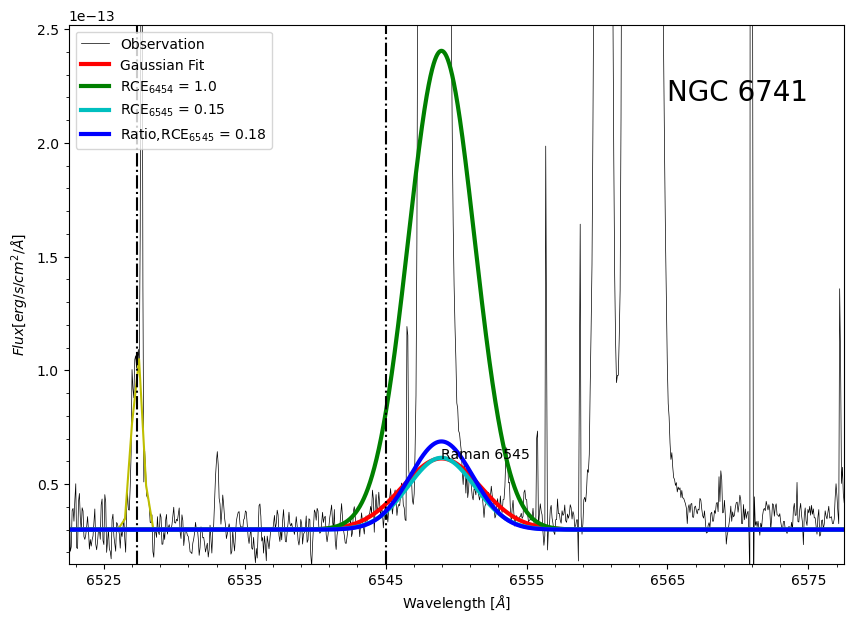

In [2]:
fig=plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()

Fc = 0.3e-13
F_0 = 1.48e-12 - Fc
he_o = 6560.11 
he_line = 6560.47
r_he_o= 6544.59 
r_he_line = 6548.96  

sigma = 0.35
F_Raman_D = 6.13e-14 - Fc
sigma_D = 2.76 

# plt.subplot(121)
plt.plot(lam,flux,'k',lw=0.5,label='Observation')
f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
# plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
aa= np.argmax(f_DR)
plt.text(x[aa],f_DR[aa],'Raman 6545')
# xx = np.linspace(0.1,0.2,4)
# for ii in xx :
# ratio = 6560.47 / 1025.27
    # sigma= 0.343


x_6527 = np.arange(6510,6530,0.5)
F_6527_p =1.09e-13 - Fc
lam_6527 = 6527.38 
sig_6527 = 0.37
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527,'y')

total_f_ratio = 108


ef = 1.0
f_R =R_Flux(F_6527_p,x,r_he_line,sig_6527,ratio_6527,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6454},ef))




# plt.legend(loc='upper left')
# plt.title('NGC 6741')
x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.text(x_max-10,F_6527_p*2.77 ,'NGC 6741',size=20)
plt.ylabel(r'$Flux[erg/s/cm^2/\AA]$')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)
lam_0_6527= 6527.1
lam_0_6545 = 6544.75
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(lam_6527+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')


x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x_flux,r_he_line,sigma_D,Fc)
ef = 1.0
f_R_1 =R_Flux(F_6527_p,x_flux,r_he_line,sigma,ratio_6527,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

ef = 0.15
f_R =R_Flux(F_6527_p,x,r_he_line,sig_6527,ratio_6527,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ef))

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_6527_p,x,r_he_line,sigma,ratio_6527,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'b',lw=3,label=r'Ratio,RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.legend(loc='upper left')

plt.minorticks_on()


5000
Total flux of RCE 1 case is =  1.214497233665991e-12
Total flux of Observed case is =  9.477561506379802e-14
RCE of ratio is  0.07803691308354438


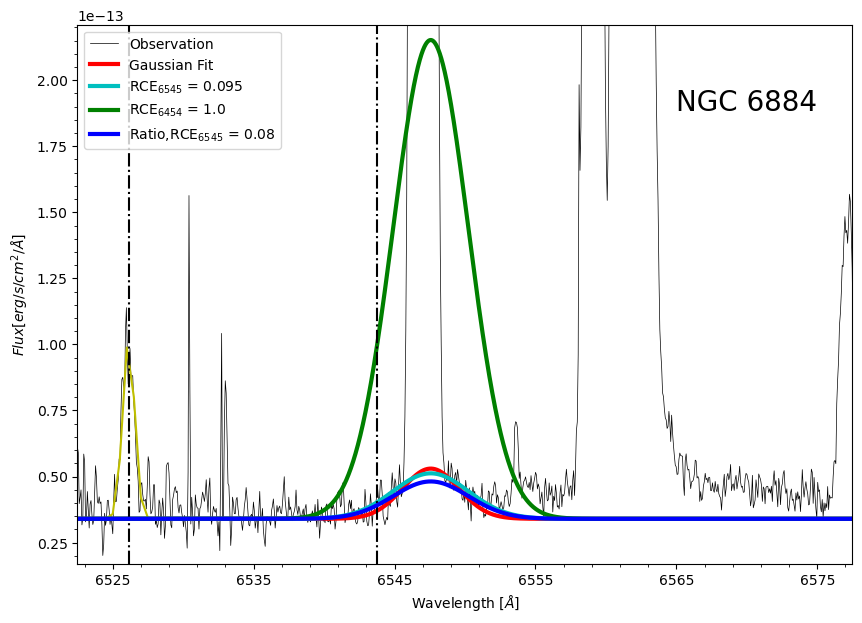

In [3]:
# NGC 6884
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.34e-13
vel = 16.855
he_line = 6559.12  
r_he_line = 6547.57
F_0 = 1.44e-12 - Fc
sigma = 0.42  
F_Raman_D = 5.30e-14 - Fc
sigma_D = 1.99

plt.plot(lam,flux,'k',lw=0.5,label='Observation')
f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
# plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')




x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 1.02e-13 - Fc
lam_6527 = 6526.13 
sig_6527 = 0.42
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527,'y')

total_f_ratio = 108
ef = 0.095
f_R =R_Flux(F_6527_p,x,r_he_line,sig_6527,ratio_6527,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ef))

ef = 1.0
f_R =R_Flux(F_6527_p,x,r_he_line,sig_6527,ratio_6527,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6454},ef))






x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.text(x_max-10,F_6527_p*2.77 ,'NGC 6884',size=20)

plt.ylabel(r'$Flux[erg/s/cm^2/\AA]$')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)
lam_0_6527= 6527.1
lam_0_6545 = 6544.75
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(lam_6527+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')

x_flux = np.arange(x_min,x_max,0.01)
print(len(x_flux))
f_DR = Data_R_Flux(F_Raman_D,x_flux,r_he_line,sigma_D,Fc)
ef = 1.0
f_R_1 =R_Flux(F_6527_p,x_flux,r_he_line,sigma,ratio_6527,total_f_ratio ,ef,Fc)

tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
print('Total flux of RCE 1 case is = ',tot_f_ram_1)

tot_f_obv_ram = total_flux(f_DR,x_flux,Fc)
print('Total flux of Observed case is = ',tot_f_obv_ram)

print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

# ef = 0.15
# f_R =R_Flux(F_6527_p,x,r_he_line,sig_6527,ratio_6527,total_f_ratio ,ef,Fc)
# plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ef))

ef = tot_f_obv_ram / tot_f_ram_1
f_R =R_Flux(F_6527_p,x,r_he_line,sigma,ratio_6527,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'b',lw=3,label=r'Ratio,RCE$_{}$ = {:.2f}'.format({6545},ef))
plt.legend(loc='upper left')


plt.minorticks_on()
plt.legend(loc='upper left')

In [15]:
dx = (21.14 /6545)
print(dx)

96.89839572192513


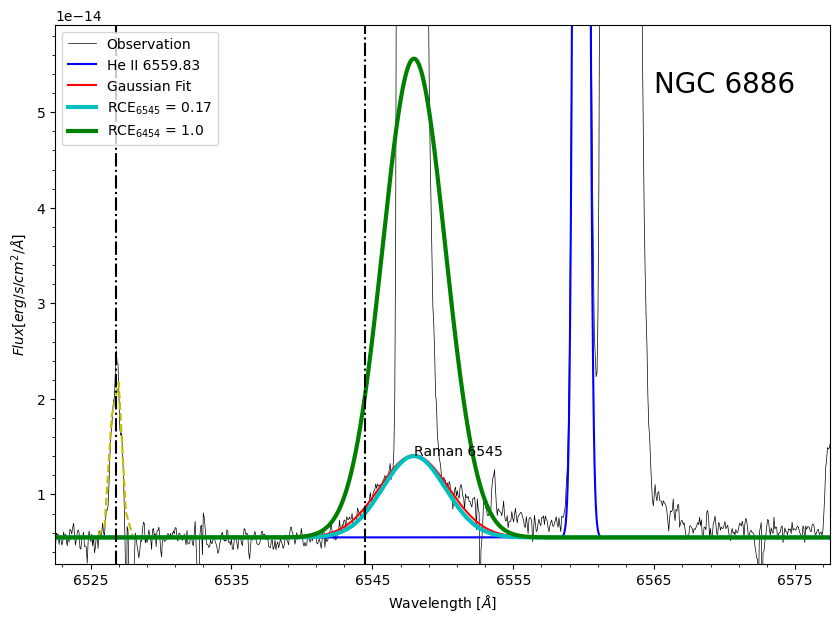

In [52]:
# NGC 6886
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.55e-14
vel = 16.855
he_line = 6559.83 
r_he_line =  6547.95
sigma = 0.33


F_0 = 4.30e-13 - Fc
F_Raman_D = 1.41e-14 - Fc
sigma_D =2.45 

plt.plot(lam,flux,'k',lw=0.5,label='Observation')
f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)

plt.plot(x,f,'b',label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',label='Gaussian Fit')
aa = np.argmax(f_DR)
plt.text(x[aa],f_DR[aa],'Raman 6545')

# xx = np.linspace(0.1,0.2,5)
# for ii in xx :
#     # ratio = 6560 / 1025
#     # sigma= 0.32


x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 2.43e-14 - Fc
lam_6527 = 6526.81 
sig_6527 = 0.35
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527,'y--')

total_f_ratio = 108
ef = 0.17
f_R =R_Flux(F_6527_p,x,r_he_line,sig_6527,ratio_6527,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ef))

ef = 1.0
f_R =R_Flux(F_6527_p,x,r_he_line,sig_6527,ratio_6527,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6454},ef))
x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'$Flux[erg/s/cm^2/\AA]$')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)
plt.text(x_max-10,F_6527_p*2.77 ,'NGC 6886',size=20)

lam_0_6527= 6527.1
lam_0_6545 = 6544.70
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(lam_6527+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')

plt.minorticks_on()

plt.legend(loc='upper left')


In [28]:
dx = abs(21.44-del_lam) / 6545 * 3e5 / 6.385 
print(dx)

27.207579835524783


In [76]:
V_6545 =(6547.93 - lam_0_6545) / lam_0_6545 *3e5
V_6527 = (6526.58-lam_0_6527) / lam_0_6527 *3e5

lam_obs_6560 = 6559.57
lam_obs_6527 = 6526.58
lam_obs_6545 = 6547.93

lam_0_6545 = 6544.7
lam_0_6527 = 6527.1
lam_0_6560 = 6560.1


V_app = (1/6.385)*((lam_obs_6545 - lam_obs_6560) - (lam_0_6545- lam_0_6560) ) / lam_0_6545 *3e5
print(V_app)

26.99345369263659


: 

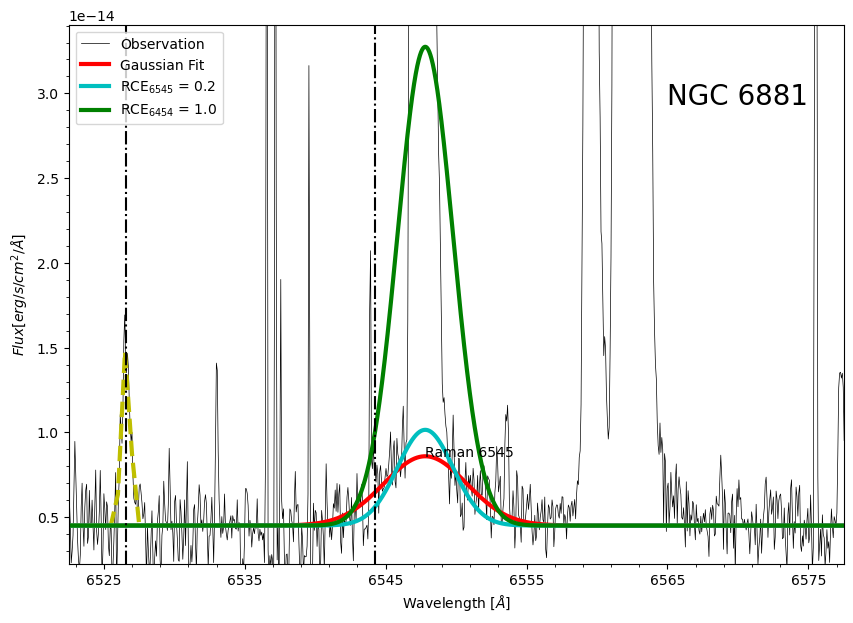

In [5]:
# NGC 6881
fig = plt.figure(1,figsize=(10,7))
path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
header = ['lambda', 'flux']
Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()



Fc = 0.45e-14
vel = 16.855
he_line = 6559.57
r_he_line =  6547.81
sigma = 0.25


F_0 = 2.83e-13 - Fc
# F_0 = 2.93e-13 - Fc
F_Raman_D = 8.59e-15 - Fc
sigma_D =2.94
# sigma_D =1.94
# plt.subplot(121)
plt.plot(lam,flux,'k',lw=0.5,label='Observation')

f = Flux(F_0,x,he_line,sigma,Fc)
f_DR = Data_R_Flux(F_Raman_D,x,r_he_line,sigma_D,Fc)
# plt.plot(x,f,'b',lw=3,label=r'He II {0}'.format(he_line))
plt.plot(x,f_DR,'r',lw=3,label='Gaussian Fit')
aa= np.argmax(f_DR)
plt.text(x[aa],f_DR[aa],'Raman 6545')



x_6527 = np.arange(6510,6530,0.5)
F_6527_p = 1.51e-14 - Fc
lam_6527 =6526.58
sig_6527 = 0.31 
f_6527 = Flux(F_6527_p,x_6527,lam_6527,sig_6527,Fc)
plt.plot(x_6527,f_6527,'y--',lw=3)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.ylabel(r'$Flux[erg/s/cm^2/\AA]$')
plt.xlabel(r'Wavelength $[\AA]$')
plt.xticks(np.linspace(x_min,x_max,6))
plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)
plt.minorticks_on()

plt.text(x_max-10,F_6527_p*2.77 ,'NGC 6881',size=20)

# xx = np.linspace(0.1,0.2,5)
# for ii in xx :
    # ratio = 6560 / 1025
    # sigma= 0.32
total_f_ratio = 108
ef = 0.2
f_R =R_Flux(F_6527_p,x,r_he_line,sig_6527,ratio_6527,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'c',lw=3,label=r'RCE$_{0}$ = {1}'.format({6545},ef))

ef = 1.0
f_R =R_Flux(F_6527_p,x,r_he_line,sig_6527,ratio_6527,total_f_ratio ,ef,Fc)
plt.plot(x,f_R,'g',lw=3,label=r'RCE$_{0}$ = {1}'.format({6454},ef))

lam_0_6527= 6527.1
lam_0_6545 = 6544.75
del_lam = (lam_0_6545 - lam_0_6527 )
plt.vlines(lam_6527,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
plt.vlines(lam_6527+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
# # plt.plot(x,f_R,'k',label='Raman He II {0} and Cloudy mean ratio {1}'.format(r_he_line,5.2))
plt.legend()
